### EDA

In [1]:
import pandas as pd
df = pd.read_excel('preprocessed_두리발_2020년1월_2022년7월_콜상세내역.xlsx')
df.head()

접수일시  월        출발지역       목적지역   호출지경도   호출지위도   목적지경도  \
0 2020-01-01 00:00:37.293  1    부산광역시 북구     부산 사하구  492973  290634  488050   
1 2020-01-01 00:07:01.397  1   부산광역시 연제구   부산광역시 북구  496437  287956  492997   
2 2020-01-01 00:21:50.623  1    부산광역시 중구  부산광역시 동래구  494364  278475  499494   
3 2020-01-01 00:23:23.330  1    부산광역시 북구   부산광역시 북구  491389  290013  492599   
4 2020-01-01 00:34:42.987  1  부산광역시 해운대구  부산광역시 수영구  503998  285650  502492   

    목적지위도                    배차일시                승차일시                하차일시  \
0  273006 2020-01-01 01:20:24.160 2020-01-01 01:39:39 2020-01-01 02:15:23   
1  296920 2020-01-01 02:37:23.367 2020-01-01 02:56:43 2020-01-01 03:20:17   
2  289547 2020-01-01 01:27:57.327 2020-01-01 02:02:10 2020-01-01 02:37:22   
3  295250 2020-01-01 02:26:33.040 2020-01-01 02:44:25 2020-01-01 03:00:47   
4  286027 2020-01-01 03:04:10.433 2020-01-01 03:35:39 2020-01-01 03:45:13   

     요금   배차대기시간(분)  승차대기시간(분)    총대기시간(분)    승차시간(분)      직선거리(km)     주말  \
0  8040   79.781117  19.247333   99.028450  35.733333   5660.964792  False   
1  5640  150.366167  19.327217  169.693383  23.566667   6168.845968  False   
2  5400   66.111733  34.211217  100.322950  35.200000  11600.989905  False   
3  3000  123.161833  17.866000  141.027833  16.366667  10458.344273  False   
4  2160  149.457433  31.476117  180.933550   9.566667   7548.863006  False   

    공휴일  
0  True  
1  True  
2  True  
3  True  
4  True

### 4. 지역별(출발지역, 목적지역) 배차대기시간에 차이가 있을까? 차이가 있다면 그 원인은?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family = 'Malgun Gothic')
plt.rc('font', size = 12)
plt.rc('axes', unicode_minus = False) # -표시 오류 잡아줌

In [75]:
df.head()

접수일시  월        출발지역       목적지역   호출지경도   호출지위도   목적지경도  \
0 2020-01-01 00:00:37.293  1    부산광역시 북구     부산 사하구  492973  290634  488050   
1 2020-01-01 00:07:01.397  1   부산광역시 연제구   부산광역시 북구  496437  287956  492997   
2 2020-01-01 00:21:50.623  1    부산광역시 중구  부산광역시 동래구  494364  278475  499494   
3 2020-01-01 00:23:23.330  1    부산광역시 북구   부산광역시 북구  491389  290013  492599   
4 2020-01-01 00:34:42.987  1  부산광역시 해운대구  부산광역시 수영구  503998  285650  502492   

    목적지위도                    배차일시                승차일시                하차일시  \
0  273006 2020-01-01 01:20:24.160 2020-01-01 01:39:39 2020-01-01 02:15:23   
1  296920 2020-01-01 02:37:23.367 2020-01-01 02:56:43 2020-01-01 03:20:17   
2  289547 2020-01-01 01:27:57.327 2020-01-01 02:02:10 2020-01-01 02:37:22   
3  295250 2020-01-01 02:26:33.040 2020-01-01 02:44:25 2020-01-01 03:00:47   
4  286027 2020-01-01 03:04:10.433 2020-01-01 03:35:39 2020-01-01 03:45:13   

     요금   배차대기시간(분)  승차대기시간(분)    총대기시간(분)    승차시간(분)      직선거리(km)     주말  \
0  8040   79.781117  19.247333   99.028450  35.733333   5660.964792  False   
1  5640  150.366167  19.327217  169.693383  23.566667   6168.845968  False   
2  5400   66.111733  34.211217  100.322950  35.200000  11600.989905  False   
3  3000  123.161833  17.866000  141.027833  16.366667  10458.344273  False   
4  2160  149.457433  31.476117  180.933550   9.566667   7548.863006  False   

    공휴일  
0  True  
1  True  
2  True  
3  True  
4  True

In [76]:
df = df[df['목적지역'] != '부산']
df = df[df['출발지역'] != '부산']

- 출발지역별 배차대기시간 분석

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_17428\3818646775.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='출발지역', y='총대기시간(분)', data=df, palette='Set3')


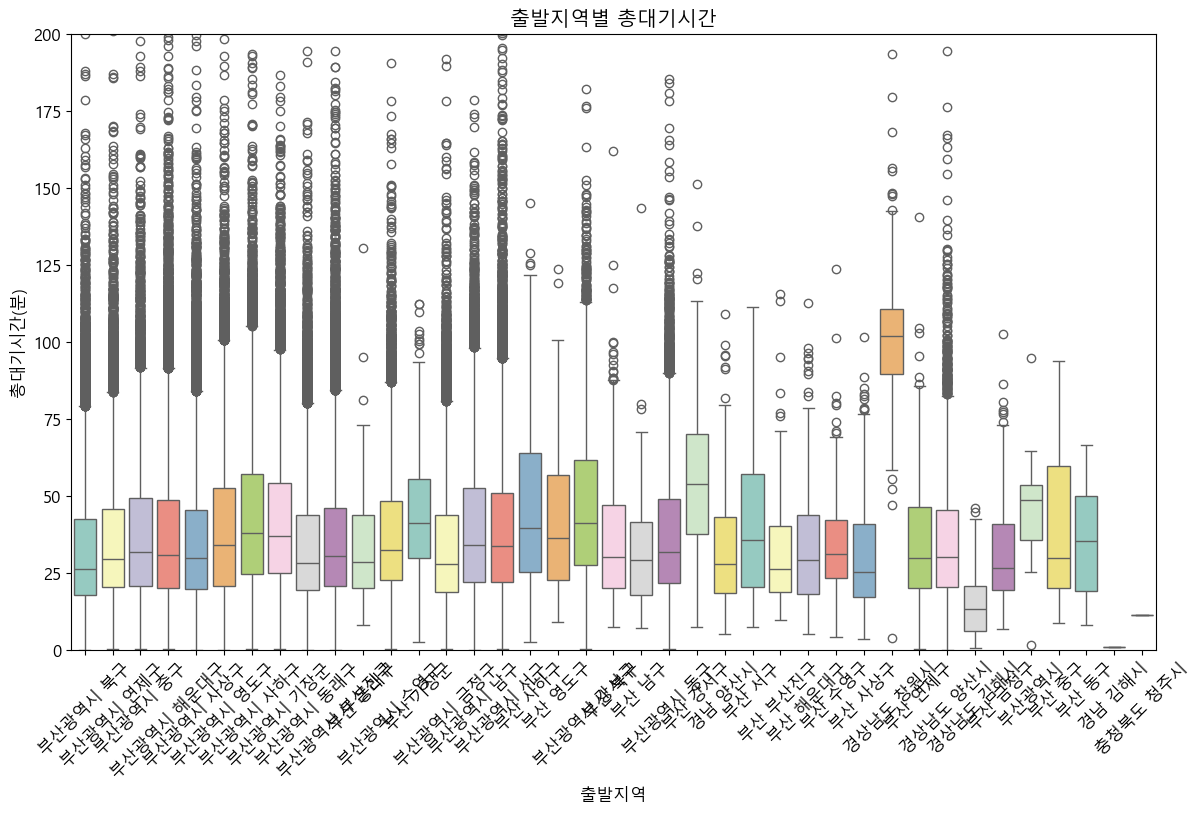

In [77]:
# 출발지역별로 데이터 그룹화
departure_groups = df.groupby('출발지역')

# 출발지역별 배차대기시간의 데이터를 리스트로 저장
waiting_time_data = [group['총대기시간(분)'].tolist() for name, group in departure_groups]

# 상자그림 그리기
plt.figure(figsize=(14, 8))
sns.boxplot(x='출발지역', y='총대기시간(분)', data=df, palette='Set3')
plt.title('출발지역별 총대기시간')
plt.xlabel('출발지역')
plt.ylabel('총대기시간(분)')
plt.ylim(0, 200)
plt.xticks(rotation=45)
plt.show()

In [40]:
# 출발 지역별 대기시간의 평균 계산
average_waiting_time = df.groupby("출발지역")["총대기시간(분)"].mean().sort_values(ascending=False)

# 결과 출력
print(average_waiting_time)

출발지역
경남 창원시     101.788425
부산 강서구      46.377865
부산 사하구      42.897487
부산 기장군      41.700278
부산 남구       38.952367
부산 서구       38.763484
부산 영도구      38.716462
부산 중구       37.619588
부산 수영구      37.214090
부산 동구       36.890670
부산 해운대구     36.429965
부산 부산진구     35.408664
경남 양산시      35.225182
부산 연제구      35.189476
부산 사상구      34.496164
부산 동래구      33.508033
부산 금정구      33.153549
부산 북구       32.111952
경남 김해시      14.380897
충북 청주시      11.265333
Name: 총대기시간(분), dtype: float64


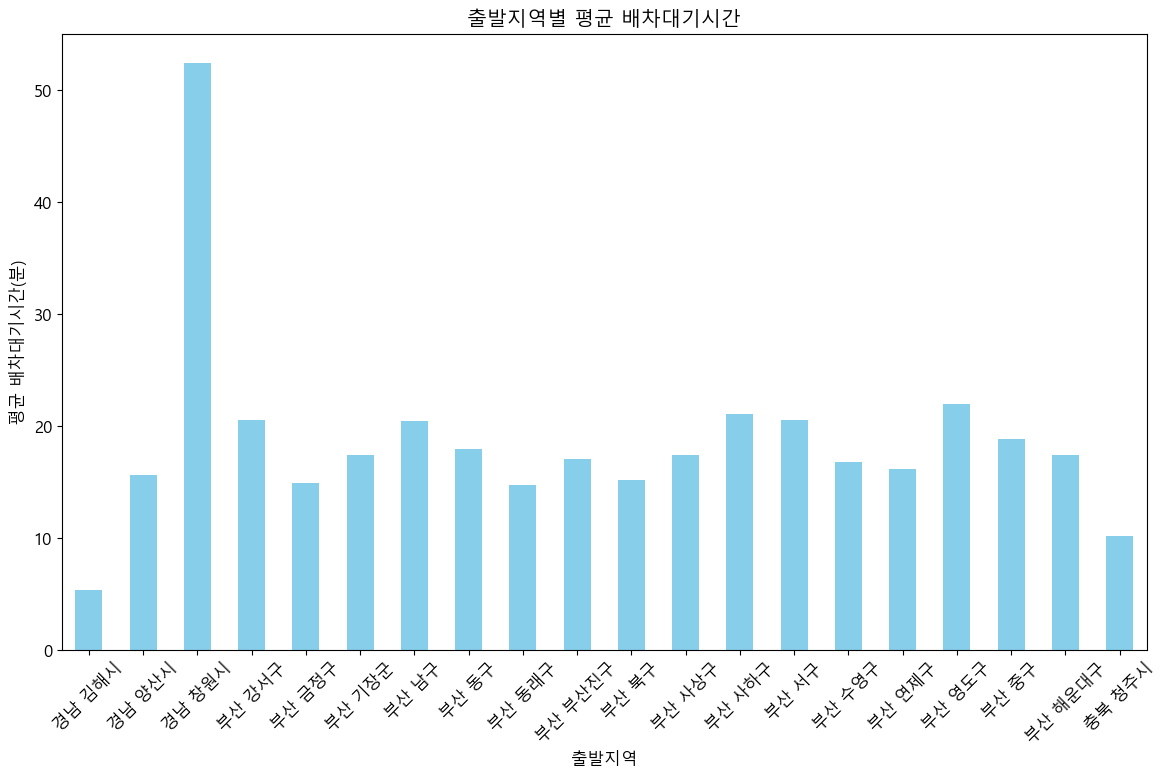

In [78]:
# 출발지역별 배차대기시간의 평균 계산
mean_waiting_time_by_departure = departure_groups['배차대기시간(분)'].mean()

# 시각화
plt.figure(figsize=(14, 8))
mean_waiting_time_by_departure.plot(kind='bar', color='skyblue')
plt.title('출발지역별 평균 배차대기시간')
plt.xlabel('출발지역')
plt.ylabel('평균 배차대기시간(분)')
plt.xticks(rotation=45)
plt.show()

* 경남 창원시 상세 분석

In [79]:
changwon_departures = df[df['출발지역'].str.contains('창원시')]
changwon_departures

접수일시   월    출발지역     목적지역   호출지경도   호출지위도   목적지경도  \
546    2020-01-02 09:31:00.000   1  경남 창원시    부산 북구  461330  291225  494453   
4461   2020-01-07 09:31:00.000   1  경남 창원시    부산 북구  461330  291225  494453   
6278   2020-01-09 09:30:00.000   1  경남 창원시    부산 북구  461330  291225  494453   
7270   2020-01-10 10:01:00.000   1  경남 창원시  부산 부산진구  452944  292864  495556   
10302  2020-01-14 09:41:00.000   1  경남 창원시    부산 북구  461330  291225  494453   
12226  2020-01-16 09:31:00.000   1  경남 창원시    부산 북구  461330  291225  494453   
16159  2020-01-21 09:40:00.000   1  경남 창원시    부산 북구  461330  291225  494453   
18057  2020-01-23 09:31:00.000   1  경남 창원시    부산 북구  461330  291225  494453   
20827  2020-01-28 09:31:00.000   1  경남 창원시    부산 북구  461330  291225  494453   
22670  2020-01-30 09:31:00.000   1  경남 창원시    부산 북구  461330  291225  494453   
26359  2020-02-04 09:31:00.000   2  경남 창원시    부산 북구  461330  291225  494453   
28147  2020-02-06 09:41:00.000   2  경남 창원시    부산 북구  461330  291225  494453   
29310  2020-02-07 13:01:00.000   2  경남 창원시  부산 부산진구  452944  292864  495556   
31751  2020-02-11 09:31:00.000   2  경남 창원시    부산 북구  461330  291225  494453   
33556  2020-02-13 09:31:00.000   2  경남 창원시    부산 북구  461330  291225  494453   
37297  2020-02-18 09:41:00.000   2  경남 창원시    부산 북구  461330  291225  494453   
39129  2020-02-20 09:41:00.000   2  경남 창원시    부산 북구  461330  291225  494453   
58459  2020-04-03 10:01:00.000   4  경남 창원시  부산 부산진구  452950  292874  495556   
60251  2020-04-07 10:01:00.000   4  경남 창원시  부산 부산진구  452950  292874  495556   
80208  2020-05-12 09:01:00.000   5  경남 창원시    부산 북구  461330  291225  494453   
81046  2020-05-13 09:01:00.000   5  경남 창원시    부산 동구  462281  292293  496522   
81079  2020-05-13 09:31:00.000   5  경남 창원시   부산 사상구  474606  278120  491167   
81875  2020-05-14 09:41:00.000   5  경남 창원시    부산 북구  461299  291228  494453   
82730  2020-05-15 09:41:00.000   5  경남 창원시   부산 사상구  474606  278120  491167   
84196  2020-05-18 09:30:00.000   5  경남 창원시    부산 북구  461299  291228  494453   
86626  2020-05-21 09:41:00.000   5  경남 창원시    부산 북구  461299  291228  494453   
88088  2020-05-23 09:01:00.000   5  경남 창원시  부산 부산진구  462281  292293  496332   
89846  2020-05-26 09:41:00.000   5  경남 창원시    부산 북구  461299  291228  494453   
91448  2020-05-28 09:31:00.000   5  경남 창원시    부산 북구  461299  291228  494453   
91479  2020-05-28 10:01:00.000   5  경남 창원시  부산 해운대구  466839  278802  502325   
94556  2020-06-02 09:27:19.710   6  경남 창원시    부산 북구  461299  291228  494453   
96193  2020-06-04 09:31:00.000   6  경남 창원시    부산 북구  461299  291228  494453   
97025  2020-06-05 10:01:00.000   6  경남 창원시  부산 부산진구  452950  292874  495556   
97703  2020-06-06 09:01:00.000   6  경남 창원시   부산 기장군  466970  279014  509902   
98189  2020-06-07 12:31:00.000   6  경남 창원시   부산 영도구  473903  278375  495207   
99462  2020-06-09 09:31:00.000   6  경남 창원시    부산 북구  461299  291228  494453   
101123 2020-06-11 09:31:00.000   6  경남 창원시    부산 북구  461299  291228  494453   
105919 2020-06-18 09:41:00.000   6  경남 창원시    부산 북구  461299  291228  494453   
109356 2020-06-23 09:31:00.000   6  경남 창원시    부산 북구  461299  291228  494453   
111062 2020-06-25 09:31:00.000   6  경남 창원시    부산 북구  461299  291228  494453   
111088 2020-06-25 10:01:00.000   6  경남 창원시   부산 동래구  453308  293584  498193   
114503 2020-06-30 09:31:00.000   6  경남 창원시    부산 북구  461299  291228  494453   
116218 2020-07-02 09:41:00.000   7  경남 창원시    부산 북구  461299  291228  494453   
117110 2020-07-03 10:01:00.000   7  경남 창원시  부산 부산진구  452950  292874  495556   
119581 2020-07-07 09:31:00.000   7  경남 창원시    부산 북구  461299  291228  494453   
121396 2020-07-09 09:31:00.000   7  경남 창원시    부산 북구  461299  291228  494453   
124412 2020-07-14 09:41:00.000   7  경남 창원시    부산 북구  461299  291228  494453   
126181 2020-07-16 09:31:00.000   7  경남 창원시    부산 북구  461299  291228  494453   
129581 2020-07-21 09:31:00.000   7  경남 창원시    부산 북구  461299  291228  494453   
130445 2020-07-22 09:01:00.000   7  경남 창원시  부산 해운대구  464356  291379  506696 

*출발지역별 배차대기시간 분석 결과*
1. 부산시에서의 이용자가 많다.
2. 부산시 이외의 지역에서는 경남 양산시에서의 이용이 가장 많다.
3. 출발지역에 따른 평균 배차대기시간의 차이가 크지 않다.
4. 출발지역이 경남 창원시인 경우 평균 배차대기시간이 다른 지역과 비교해 두 배 이상(약30분) 길다.

* 목적지역별 배차대기시간 분석

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_17428\3520493673.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='목적지역', y='총대기시간(분)', data=df, palette='Set3')


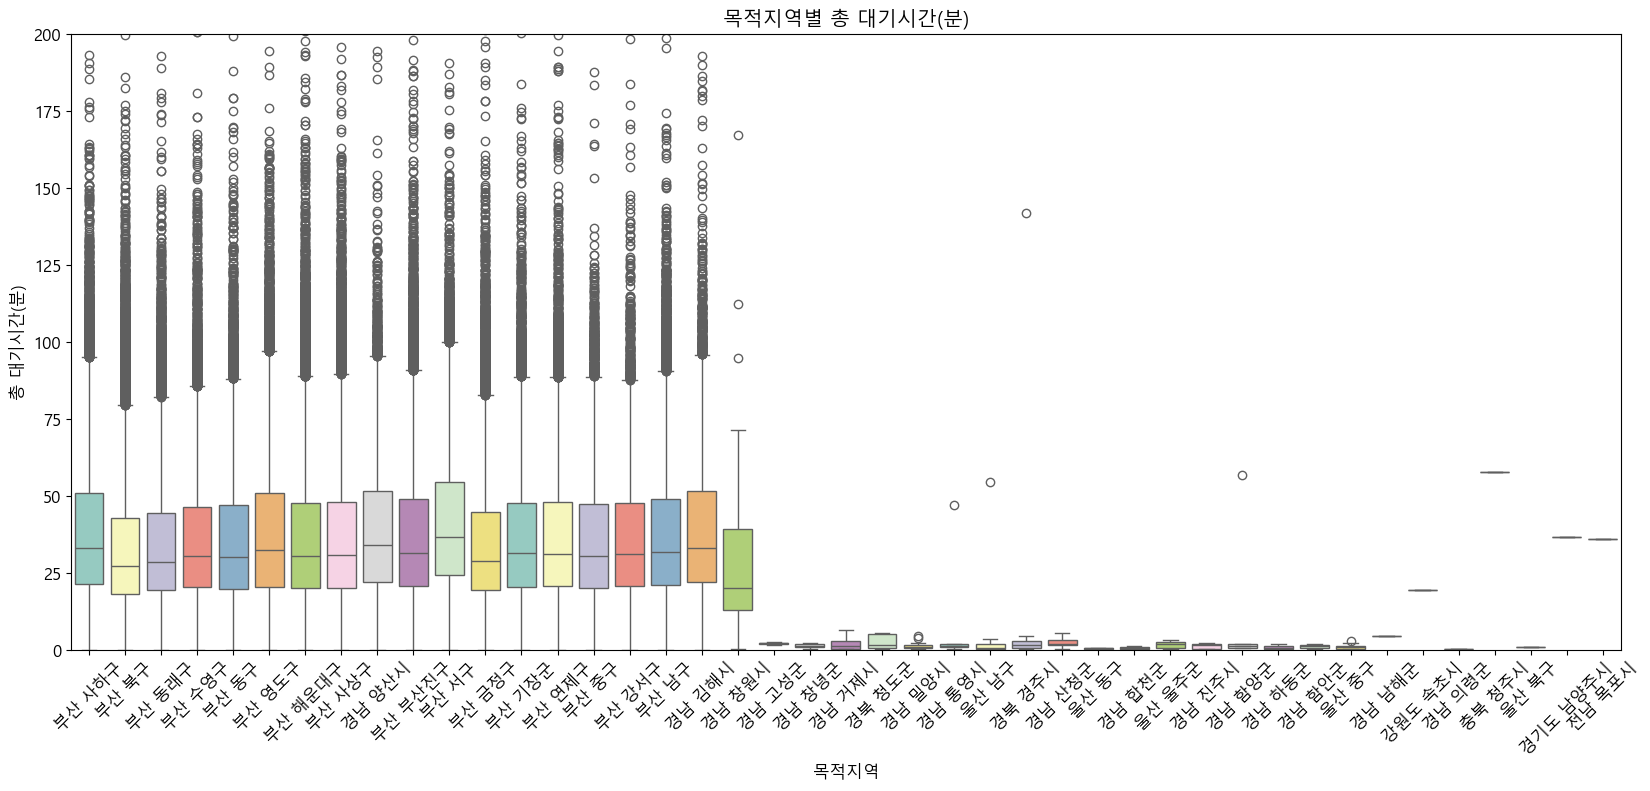

In [44]:
# 출발지역별로 데이터 그룹화
destination_groups = df.groupby('목적지역')

# 출발지역별 배차대기시간의 데이터를 리스트로 저장
waiting_time_data = [group['총대기시간(분)'].tolist() for name, group in destination_groups]

# 상자그림 그리기
plt.figure(figsize=(20, 8))
sns.boxplot(x='목적지역', y='총대기시간(분)', data=df, palette='Set3')
plt.title('목적지역별 총 대기시간(분)')
plt.xlabel('목적지역')
plt.ylabel('총 대기시간(분)')
plt.ylim(0, 200)
plt.xticks(rotation=45)
plt.show()

In [49]:
average_waiting_time_sorted_destination = (
    df.groupby("목적지역")["총대기시간(분)"]
    .mean()
    .sort_values(ascending=False)  # 오름차순 정렬
)

# 결과 출력
pd.DataFrame(average_waiting_time_sorted_destination)

총대기시간(분)
목적지역               
충북 청주시    57.873833
경북 청도군    43.280778
부산 서구     41.383873
경남 김해시    39.221239
경남 양산시    38.998061
부산 사하구    38.405466
부산 영도구    37.940915
부산 남구     37.277322
부산 부산진구   36.844994
경기도 남양주시  36.775450
부산 강서구    36.760581
부산 기장군    36.513338
부산 연제구    36.289606
부산 해운대구   36.175216
부산 사상구    36.142742
전남 목포시    36.120717
부산 수영구    35.866681
부산 동구     35.597994
부산 중구     35.379198
부산 금정구    34.509328
부산 동래구    34.232676
부산 북구     32.877294
경남 창원시    31.056137
경북 경주시    28.631661
강원도 속초시   19.529500
경남 함양군    12.364980
경남 통영시     8.900547
울산 남구      7.133717
경남 남해군     4.498950
경남 산청군     2.602054
경남 고성군     2.198250
경남 거제시     2.028767
울산 울주군     1.772810
경남 밀양시     1.627144
경남 창녕군     1.497608
경남 진주시     1.435790
경남 함안군     1.282000
울산 중구      1.216589
울산 북구      1.071167
경남 하동군     1.025825
경남 합천군     0.813525
울산 동구      0.592233
경남 의령군     0.463833

In [81]:
# 목적지역별로 데이터 그룹화
destination_groups = df.groupby('목적지역')

# 목적지역별 배차대기시간의 평균 계산
mean_waiting_time_by_destination = destination_groups['배차대기시간(분)'].mean()

# 시각화
plt.figure(figsize=(20, 8))
mean_waiting_time_by_destination.plot(kind='bar', color='skyblue')
plt.title('목적지역별 평균 배차대기시간')
plt.xlabel('목적지역')
plt.ylabel('평균 배차대기시간(분)')
plt.xticks(rotation=45)
plt.show()

*목적지역별 배차대기시간 분석 결과*
1. 부산시 내에서의 이동이 가장 많다.
2. 목적지역이 부산시인 경우 구에 따른 평균 배차대기시간의 차이가 크지 않다.
3. 부산 해운대구는 다른 부산시의 지역(구)에 비해 평균 배차대기시간이 매우 짧다.
4. 목적지역이 부산시 이외의 지역인 경우 대부분은 배차대기시간이 5분 이내이다.
5. 목적지역이 충청북도 청주시인 경우 평균 배차대기시간이 다른 지역에 비해 2배 이상 길지만 건수가 1건이므로 비교가 적절치 않다.
6. 목적지역이 부산시가 아닌 경우 건수가 1건이거나 적어서 비교가 정확하지 않다.

- 출발지역별 총 대기시간 차이

In [82]:
# '출발지역' 열 확인 및 총대기시간 데이터 준비
departure_groups = df.groupby('출발지역')['총대기시간(분)'].apply(list)

# ANOVA 검정 수행
anova_result_departure = stats.f_oneway(*departure_groups)

print(f"출발지역 별 ANOVA 결과: F-statistic = {anova_result_departure.statistic}, 
p-value = {anova_result_departure.pvalue}")

출발지역 별 ANOVA 결과: F-statistic = 816.6639235421469, p-value = 0.0


- 목적지역별 총 대기시간 차이

In [83]:
# '목적지역' 열 확인 및 총대기시간 데이터 준비
departure_groups = df.groupby('목적지역')['총대기시간(분)'].apply(list)

# ANOVA 검정 수행
anova_result_departure = stats.f_oneway(*departure_groups)

print(f"출발지역 별 ANOVA 결과: F-statistic = {anova_result_departure.statistic}, 
p-value = {anova_result_departure.pvalue}")

출발지역 별 ANOVA 결과: F-statistic = 135.1932583440143, p-value = 0.0


### 5. 거리별(호출지역과 목적지역 직선거리) 배차대기시간에 차이가 있을까?

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_17428\330868561.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  waiting_time_by_distance = df.groupby('직선거리구간')['배차대기시간(분)'].mean()


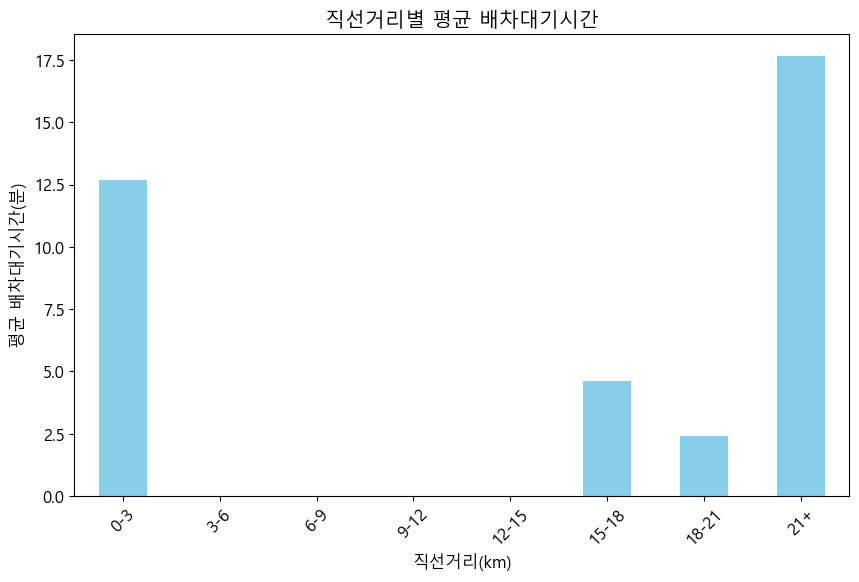

In [50]:
# 직선거리를 구간별로 나누기
distance_bins = [0, 3, 6, 9, 12, 15, 18, 21, np.inf]
distance_labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21+']
df['직선거리구간'] = pd.cut(df['직선거리(km)'], bins=distance_bins, labels=distance_labels, right=False)

# 각 구간별로 배차대기시간의 평균 계산
waiting_time_by_distance = df.groupby('직선거리구간')['배차대기시간(분)'].mean()

# 시각화
plt.figure(figsize=(10, 6))
waiting_time_by_distance.plot(kind='bar', color='skyblue')
plt.title('직선거리별 평균 배차대기시간')
plt.xlabel('직선거리(km)')
plt.ylabel('평균 배차대기시간(분)')
plt.xticks(rotation=45)
plt.show()

In [51]:
# 직선거리와 배차대기시간 간의 상관 관계 분석
correlation_distance_waiting_time = df[['직선거리(km)', '배차대기시간(분)']].corr().iloc[0, 1]

print("직선거리와 배차대기시간 간의 상관 계수:", correlation_distance_waiting_time)

직선거리와 배차대기시간 간의 상관 계수: 0.005006875758931698


In [52]:
# 구간에 속하는 데이터 할당
df['distance_bin'] = pd.cut(df['직선거리(km)'], bins=distance_bins)

# 각 구간의 빈도 계산
distance_frequency = df['distance_bin'].value_counts().sort_index()

print(distance_frequency)

distance_bin
(0.0, 3.0]           1
(3.0, 6.0]           0
(6.0, 9.0]           0
(9.0, 12.0]          0
(12.0, 15.0]         0
(15.0, 18.0]         1
(18.0, 21.0]         1
(21.0, inf]     654737
Name: count, dtype: int64


In [58]:
print(f"Max distance: {max_distance}")

Max distance: 20015.08679602057


In [70]:
from scipy import stats

# '직선거리(km)'의 최대값을 포함하도록 bins와 labels 수정
max_distance = df['직선거리(km)'].max()
bins = [0, 3000, 6000, 9000, 12000, 15000, 18000, max_distance+1]
labels = ['0-3km', '3-6km', '6-9km', '9-12km', '12-15km', '15-18km', '18km+']

# 거리그룹 생성
df['거리그룹'] = pd.cut(df['직선거리(km)'], bins=bins, labels=labels)

# 거리그룹별 총 대기시간 데이터 준비
distance_groups = df.groupby('거리그룹')['총대기시간(분)'].apply(list)

# 거리그룹별 총 대기시간 분포 시각화
plt.figure(figsize=(12, 6))
df.boxplot(column='총대기시간(분)', by='거리그룹', grid=False)
plt.title('총 대기시간 분포 by 거리그룹')
plt.suptitle('')
plt.xlabel('거리그룹')
plt.ylabel('총 대기시간(분)')
plt.ylim(0, 100)
plt.show()

# ANOVA 검정 수행
anova_result_distance = stats.f_oneway(*distance_groups)

print(f"거리그룹 별 ANOVA 결과: F-statistic = {anova_result_distance.statistic}, p-value = {anova_result_distance.pvalue}")

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_17428\3769043117.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_groups = df.groupby('거리그룹')['총대기시간(분)'].apply(list)


<Figure size 1200x600 with 0 Axes>

거리그룹 별 ANOVA 결과: F-statistic = 26.815451967995, p-value = 3.867700827207032e-32


In [72]:
distance_groups = df.groupby('거리그룹')['총대기시간(분)'].mean().sort_values(ascending=False)
distance_groups

C:\Users\Choeminhwa\AppData\Local\Temp\ipykernel_17428\3833064750.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_groups = df.groupby('거리그룹')['총대기시간(분)'].mean().sort_values(ascending=False)


거리그룹
18km+      37.661001
3-6km      36.549227
9-12km     36.531851
6-9km      36.427435
12-15km    36.151912
0-3km      36.101324
15-18km    35.988522
Name: 총대기시간(분), dtype: float64

In [101]:
# ANOVA 검정 수행
anova_result_distance = stats.f_oneway(*distance_groups)

print(f"거리그룹 별 ANOVA 결과: F-statistic = {anova_result_distance.statistic}, p-value = {anova_result_distance.pvalue}")

거리그룹 별 ANOVA 결과: F-statistic = 25.75701923703004, p-value = 2.237205005964312e-21


*거리별 배차대기시간 분석 결과*
1. 출발지역과 목적지역 사이의 거리와 배차대기시간 간의 상관관계는 약하다.